# Verificación de Balance en un Árbol Binario

El balance de un árbol binario es un indicador crítico de su eficiencia, especialmente en operaciones de búsqueda, inserción y eliminación. Un árbol se considera balanceado si para cada nodo, la altura de sus subárboles izquierdo y derecho difiere como máximo en uno.

- **Concepto de Árbol Binario Balanceado:**
  - Un árbol binario está balanceado si para cada nodo, la diferencia de altura entre sus subárboles izquierdo y derecho es no más de uno.
  - Esta propiedad es crucial para garantizar una eficiencia operativa óptima, especialmente en árboles AVL y árboles rojo-negro.

- **Aplicaciones de la Verificación de Balance:**
  - Fundamental en el mantenimiento y optimización de árboles de búsqueda binaria.
  - Importante para evaluar la necesidad de operaciones de reequilibrio.
  - Utilizado para validar la estructura de árboles después de múltiples inserciones o eliminaciones.

## Implementación en Python

Aquí te muestro cómo implementar este método en la clase [`BinaryTree`](src/BinaryTree.py), utilizando un enfoque de abajo hacia arriba:

In [1]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BinaryTree import BinaryTree

In [2]:
def is_balanced_helper(self, node):
    # Un nodo nulo se considera balanceado.
    if node is None:
        return 0, True

    # Verifica el balance de los subárboles izquierdo y derecho.
    left_height, left_is_balanced = self.is_balanced_helper(node.left)
    right_height, right_is_balanced = self.is_balanced_helper(node.right)

    # La altura actual es el máximo de las alturas de los subárboles + 1.
    current_height = 1 + max(left_height, right_height)

    # El nodo actual está balanceado si ambos subárboles están balanceados y la
    # diferencia de altura no excede 1.
    is_balanced = left_is_balanced and right_is_balanced and abs(left_height - right_height) <= 1

    return current_height, is_balanced

def is_balanced(self):
    _, is_balanced = self.is_balanced_helper(self.root)
    return is_balanced

# Extender la clase BinaryTree con el nuevo método is_balanced
BinaryTree.is_balanced = is_balanced
BinaryTree.is_balanced_helper = is_balanced_helper

## Pruebas de `is_balanced`

Probemos la función `is_balanced` para determinar si un árbol está balanceado.

El árbol está balanceado: True


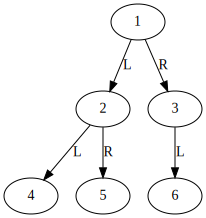

In [3]:
# Crear un árbol y agregar nodos de manera que esté balanceado
tree = BinaryTree()
tree.insert(1)
tree.insert(2)
tree.insert(3)
tree.insert(4)
tree.insert(5)
tree.insert(6)

# Verificar si el árbol está balanceado
balanceado = tree.is_balanced()
print(f"El árbol está balanceado: {balanceado}")

# Visualizar el árbol
dot = visualize_bt(tree)
dot

## Complejidad del Algoritmo

- **Complejidad Temporal:** La complejidad temporal del método `is_balanced` es O(N), donde N es el número de nodos en el árbol. Esto se debe a que cada nodo es visitado una vez.

- **Complejidad Espacial:** La complejidad espacial es O(H), donde H es la altura del árbol, que representa el tamaño máximo de la pila de llamadas recursivas. En el peor de los casos, esto podría ser O(N).

## Ejercicios Prácticos

1. Modificar el método `is_balanced` para que retorne también la altura del árbol.
2. Implementar una función que cuente cuántos nodos están en el nivel más profundo de un árbol balanceado.

## Soluciones a los Ejercicios

In [4]:
# **Ejercicio 1:**

# La función `is_balanced_helper` ya devuelve la altura junto con el estado de
# balance, así que podemos adaptar `is_balanced` para retornar ambos:

def is_balanced_and_height(self):
    height, is_balanced = self.is_balanced_helper(self.root)
    return is_balanced, height

# **Ejercicio 2:**

# Para contar los nodos en el nivel más profundo de un árbol balanceado, podemos
# utilizar un recorrido por niveles:

from collections import deque

def count_nodes_deepest_level(tree):
    if not tree.root:
        return 0

    queue = deque([tree.root])
    while queue:
        level_size = len(queue)
        for i in range(level_size):
            node = queue.popleft()
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

    return level_size